# **Paso 1: Configuración de PySpark**

In [83]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

# Crear una sesión de Spark
spark = SparkSession.builder \
    .appName("Wildlife Strike Analysis") \
    .getOrCreate()

# Cargar los datos desde un archivo nuestra tabla

df = spark.sql("SELECT * FROM MLFAA.Predict_Damage")

# Mostrar las primeras filas del dataset
df.show()

# Descripción estadística de las columnas numéricas
df.describe().show()

# Descripción de las columnas categóricas (aproximado)
for col_name in df.columns:
    if df.schema[col_name].dataType == 'string':
        df.groupBy(col_name).count().show(10)



StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 194, Finished, Available)

+------------------+-----------------+---------------+------+-----+----------+-------------+--------------+----------------+-------------+-----------------+-----------+---------------+-----------------+---------------+-----------------+---------------+-----------------+---------------+-----------------+----------------+--------------------+---------------+-------------------+-----------+-------------+------------+----------------+-------------+------+------------------------+----------------------------+--------------------------+------------------------------+------------+
|Aircraft_Mass_Code|Number_of_Engines|Phase_of_Flight|Height|Speed|       Sky|Precipitation|Ingested_Other|Indicated_Damage|Struck_Random|Struck_Windshield|Struck_Nose|Struck_Engine_1|Ingested_Engine_1|Struck_Engine_2|Ingested_Engine_2|Struck_Engine_3|Ingested_Engine_3|Struck_Engine_4|Ingested_Engine_4|Struck_Propeller|Struck_Wing_or_Rotor|Struck_Fuselage|Struck_Landing_Gear|Struck_Tail|Struck_Lights|Struck_Other|Ef

# **Paso 2: Preprocesamiento de datos**

In [84]:
# Rellenar valores numéricos faltantes con 0
df = df.fillna(0, subset=[col for col in df.columns if df.schema[col].dataType != 'string'])

# Rellenar valores categóricos faltantes con "unknown"
df = df.fillna("unknown", subset=[col for col in df.columns if df.schema[col].dataType == 'string'])

# Mostrar los valores faltantes después del llenado
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()



StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 195, Finished, Available)

+------------------+-----------------+---------------+------+-----+---+-------------+--------------+----------------+-------------+-----------------+-----------+---------------+-----------------+---------------+-----------------+---------------+-----------------+---------------+-----------------+----------------+--------------------+---------------+-------------------+-----------+-------------+------------+----------------+-------------+----+------------------------+----------------------------+--------------------------+------------------------------+------------+
|Aircraft_Mass_Code|Number_of_Engines|Phase_of_Flight|Height|Speed|Sky|Precipitation|Ingested_Other|Indicated_Damage|Struck_Random|Struck_Windshield|Struck_Nose|Struck_Engine_1|Ingested_Engine_1|Struck_Engine_2|Ingested_Engine_2|Struck_Engine_3|Ingested_Engine_3|Struck_Engine_4|Ingested_Engine_4|Struck_Propeller|Struck_Wing_or_Rotor|Struck_Fuselage|Struck_Landing_Gear|Struck_Tail|Struck_Lights|Struck_Other|Effect_on_Flight|N

In [85]:
# Código generado por Data Wrangler para PySpark DataFrame

from pyspark.sql import functions as F
from pyspark.sql import types as T

def clean_data(df):
    # Derivar la columna 'Aircraft_Mass_Code_Int' de la columna: 'Aircraft_Mass_Code'
    # Transformación basada en los siguientes ejemplos:
    #    Aircraft_Mass_Code    Salida
    # 1: "4"                => "4"
    # 2: "2"                => "2"
    # 3: "3"                => "3"
    pd_udf_fn = F.pandas_udf(lambda v : v, T.StringType())
    df = df.withColumn("Aircraft_Mass_Code_Int", pd_udf_fn(F.col("Aircraft_Mass_Code")))
    # Se ha realizado la codificación con varias etiquetas en la columna 'Aircraft_Mass_Code' dividida con delimitador '_'
    # ⚠️ Esto se generó para que coincida con la lógica de pandas original, pero puede tener problemas de rendimiento.
    old_cols = df.columns
    loc_0 = list(df.columns).index('Aircraft_Mass_Code')
    new_cols = []
    df = df.withColumn('Aircraft_Mass_Code_split', F.split(df['Aircraft_Mass_Code'], '_'))
    labels_set = df.withColumn('Aircraft_Mass_Code_exploded', F.explode('Aircraft_Mass_Code_split')).agg(F.collect_set('Aircraft_Mass_Code_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Aircraft_Mass_Code_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Aircraft_Mass_Code_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_0], *new_cols, *old_cols[loc_0+1:])
    # Eliminar columna: 'Aircraft_Mass_Code_Int'
    df = df.drop('Aircraft_Mass_Code_Int')
    # Se ha realizado la codificación con varias etiquetas en la columna 'Number_of_Engines' dividida con delimitador '_'
    # ⚠️ Esto se generó para que coincida con la lógica de pandas original, pero puede tener problemas de rendimiento.
    old_cols = df.columns
    loc_0 = list(df.columns).index('Number_of_Engines')
    new_cols = []
    df = df.withColumn('Number_of_Engines_split', F.split(df['Number_of_Engines'], '_'))
    labels_set = df.withColumn('Number_of_Engines_exploded', F.explode('Number_of_Engines_split')).agg(F.collect_set('Number_of_Engines_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Number_of_Engines_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Number_of_Engines_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_0], *new_cols, *old_cols[loc_0+1:])
    # Se ha realizado la codificación de varias etiquetas en columnas 'Phase_of_Flight', 'Sky' y 4 otras columnas divididas con delimitador '_'
    # ⚠️ Esto se generó para que coincida con la lógica de pandas original, pero puede tener problemas de rendimiento.
    old_cols = df.columns
    loc_0 = list(df.columns).index('Phase_of_Flight')
    new_cols = []
    df = df.withColumn('Phase_of_Flight_split', F.split(df['Phase_of_Flight'], '_'))
    labels_set = df.withColumn('Phase_of_Flight_exploded', F.explode('Phase_of_Flight_split')).agg(F.collect_set('Phase_of_Flight_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Phase_of_Flight_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Phase_of_Flight_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_0], *new_cols, *old_cols[loc_0+1:])
    old_cols = df.columns
    loc_1 = list(df.columns).index('Sky')
    new_cols = []
    df = df.withColumn('Sky_split', F.split(df['Sky'], '_'))
    labels_set = df.withColumn('Sky_exploded', F.explode('Sky_split')).agg(F.collect_set('Sky_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Sky_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Sky_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_1], *new_cols, *old_cols[loc_1+1:])
    old_cols = df.columns
    loc_2 = list(df.columns).index('Precipitation')
    new_cols = []
    df = df.withColumn('Precipitation_split', F.split(df['Precipitation'], '_'))
    labels_set = df.withColumn('Precipitation_exploded', F.explode('Precipitation_split')).agg(F.collect_set('Precipitation_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Precipitation_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Precipitation_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_2], *new_cols, *old_cols[loc_2+1:])
    old_cols = df.columns
    loc_3 = list(df.columns).index('Effect_on_Flight')
    new_cols = []
    df = df.withColumn('Effect_on_Flight_split', F.split(df['Effect_on_Flight'], '_'))
    labels_set = df.withColumn('Effect_on_Flight_exploded', F.explode('Effect_on_Flight_split')).agg(F.collect_set('Effect_on_Flight_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Effect_on_Flight_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Effect_on_Flight_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_3], *new_cols, *old_cols[loc_3+1:])
    old_cols = df.columns
    loc_4 = list(df.columns).index('Number_Struck')
    new_cols = []
    df = df.withColumn('Number_Struck_split', F.split(df['Number_Struck'], '_'))
    labels_set = df.withColumn('Number_Struck_exploded', F.explode('Number_Struck_split')).agg(F.collect_set('Number_Struck_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Number_Struck_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Number_Struck_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_4], *new_cols, *old_cols[loc_4+1:])
    old_cols = df.columns
    loc_5 = list(df.columns).index('Size')
    new_cols = []
    df = df.withColumn('Size_split', F.split(df['Size'], '_'))
    labels_set = df.withColumn('Size_exploded', F.explode('Size_split')).agg(F.collect_set('Size_exploded')).collect()[0][0]
    labels_set = sorted(labels_set)
    for i in labels_set:
        curr = 'Size_%s' % i
        new_cols.append(curr)
        df = df.withColumn(curr, F.when(F.array_contains('Size_split', i), 1).otherwise(0))
    df = df.select(*old_cols[:loc_5], *new_cols, *old_cols[loc_5+1:])
    return df

df_clean = clean_data(df)
display(df_clean)
df = df_clean

StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 196, Finished, Available)

SynapseWidget(Synapse.DataFrame, 18fce2a6-8b1f-4ff8-9750-43275a029553)

In [86]:
columns_to_remove = [
    "Aircraft_Mass_Code", "Number_of_Engines", "Phase_of_Flight", "Sky",
    "Precipitation", "Effect_on_Flight", "Number_Struck", "Size"
]

df = df.drop(*columns_to_remove)

StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 197, Finished, Available)

# **Paso 3: Codificación de datos categóricos**

Vamos a asegurarnos de que las columnas categóricas se conviertan correctamente utilizando StringIndexer y OneHotEncoder. Además, nos aseguraremos de ensamblar las características en un solo vector después de la codificación.

In [87]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Identificar las columnas categóricas y numéricas
categorical_cols = [col for col in df.columns if df.schema[col].dataType == 'string']
numeric_cols = [col for col in df.columns if df.schema[col].dataType != 'string']

# Listas para almacenar columnas válidas y transformadores exitosos
valid_categorical_cols = []
assembler_inputs = numeric_cols[:]

for col in categorical_cols:
    try:
        # StringIndexer para convertir a índices numéricos
        indexer = StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid='skip')
        df = indexer.fit(df).transform(df)
        
        # OneHotEncoder para codificación one-hot
        encoder = OneHotEncoder(inputCol=col + "_index", outputCol=col + "_ohe")
        df = encoder.fit(df).transform(df)
        
        # Añadir a la lista de columnas válidas
        valid_categorical_cols.append(col)
        assembler_inputs.append(col + "_ohe")
    except Exception as e:
        print(f"Eliminando columna problemática: {col} debido a error: {str(e)}")

# Verificar columnas eliminadas
print(f"Columnas válidas: {valid_categorical_cols}")




StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 198, Finished, Available)

Columnas válidas: []


# **Paso 4: Construir el VectorAssembler**
Después de eliminar las columnas problemáticas, construiremos el VectorAssembler.

In [88]:
# VectorAssembler para combinar todas las características en un solo vector
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Transformar el DataFrame preparado
df_prepared = assembler.transform(df)

# Mostrar las primeras filas del DataFrame preparado
df_prepared.select("features").show(truncate=False)

# Supongamos que la columna 'Indicated_Damage' es la variable objetivo
df_prepared = df_prepared.withColumnRenamed('Indicated_Damage', 'label')



StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 199, Finished, Available)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                   |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(82,[3,7,15,22,23,36,38,41,42,44,51,63,70,75,77,78,81],[1.0,1.0,1.0,115.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,10.0])                                           |
|(82,[2,7,18,22,24,35,42,44,63,70,75,77,78,81],[1.0,1.0,1.0,200.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,12.0])                                                                |
|(82,[3,7,11,21,22,25,27,37,42,44,63,70,74,77,78,81],[1.0,1.0,1.0,3000.0,200.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,11.0])     

# Paso 6: Selección de Características

Una vez que las características se han codificado correctamente, procederemos con la selección de características utilizando RandomForestClassifier y ChiSqSelector.

In [89]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import ChiSqSelector

# Supongamos que la columna 'target' es la variable objetivo
df_prepared = df_prepared.withColumnRenamed('target', 'label')

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df_prepared.randomSplit([0.8, 0.2], seed=42)

# Entrenar un modelo de bosque aleatorio
rf = RandomForestClassifier(featuresCol='features', labelCol='label', numTrees=100)
rf_model = rf.fit(train_data)

# Importancia de las características
importances = rf_model.featureImportances

# Seleccionar las características más importantes usando ChiSqSelector
selector = ChiSqSelector(numTopFeatures=10, featuresCol='features', outputCol='selectedFeatures', labelCol='label')
result = selector.fit(train_data).transform(train_data)

# Mostrar las características seleccionadas
result.select("selectedFeatures").show()


StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 200, Finished, Available)

2024-05-19:01:25:43,45 WARNING  [tracking_store.py:153] log_inputs not supported


+--------------------+
|    selectedFeatures|
+--------------------+
|     (10,[9],[60.0])|
|     (10,[9],[70.0])|
|     (10,[9],[85.0])|
|    (10,[9],[100.0])|
|    (10,[9],[110.0])|
|    (10,[9],[163.0])|
|(10,[7,9],[1.0,20...|
|(10,[7,9],[1.0,25...|
|(10,[7,9],[1.0,30...|
|(10,[7,9],[1.0,80...|
|(10,[7,9],[1.0,13...|
|(10,[6,8,9],[1.0,...|
|(10,[6,8,9],[1.0,...|
|(10,[6,8,9],[1.0,...|
|(10,[6,8,9],[1.0,...|
|(10,[6,8,9],[1.0,...|
|(10,[6,8,9],[1.0,...|
|(10,[6,8,9],[1.0,...|
|(10,[5,8,9],[1.0,...|
|(10,[5,8,9],[1.0,...|
+--------------------+
only showing top 20 rows



# Paso 7: Visualización de la Importancia de las Características
Convertir los datos a pandas y usar matplotlib para visualizar la importancia de las características:

StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 202, Finished, Available)

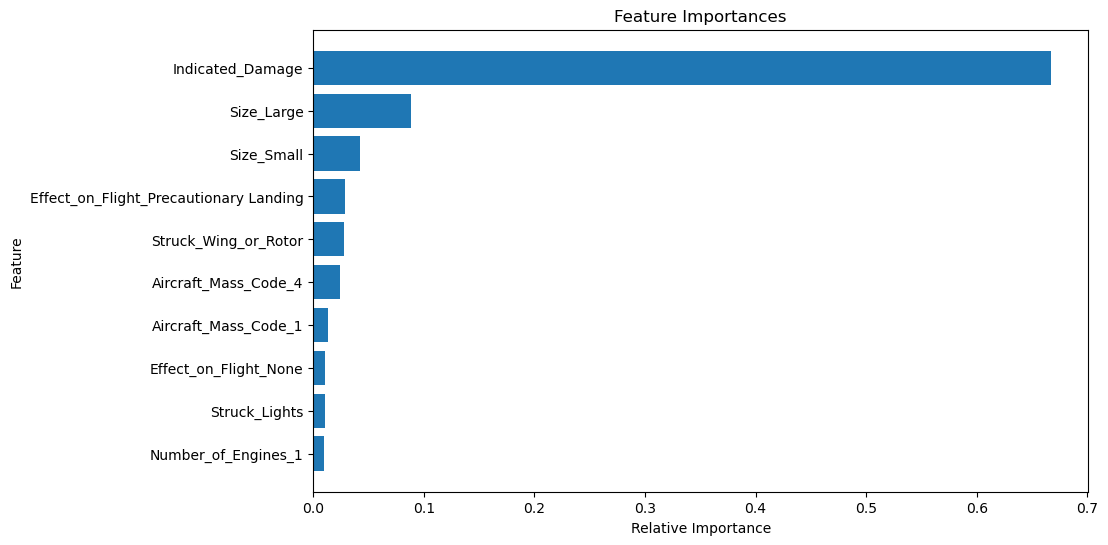

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir las importancias de características a pandas DataFrame para visualización
importances_list = importances.toArray()
features_list = assembler_inputs

importances_df = pd.DataFrame({'feature': features_list, 'importance': importances_list})
importances_df = importances_df.sort_values(by='importance', ascending=False).head(10)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(importances_df['feature'], importances_df['importance'], align='center')
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

please upload to lakehouse

In [92]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df_prepared.randomSplit([0.8, 0.2], seed=42)

# Definir el modelo de clasificación
rf = RandomForestClassifier(featuresCol='features', labelCol='label', numTrees=100)

# Definir el evaluador
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction", metricName="areaUnderROC")

# Configurar la búsqueda de hiperparámetros
paramGrid = ParamGridBuilder().build()

# Definir el CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Entrenar el modelo
cv_model = cv.fit(train_data)

# Realizar predicciones en el conjunto de prueba
predictions = cv_model.transform(test_data)

# Evaluar el modelo
roc_auc = evaluator.evaluate(predictions)
print(f"Área bajo la curva ROC: {roc_auc}")

# Mostrar algunas predicciones
predictions.select("features", "label", "prediction", "probability").show(truncate=False)


StatementMeta(, 446bda1d-7382-4607-a850-e3f6d6a35fd1, 203, Finished, Available)

2024-05-19:01:26:27,535 WARNING  [tracking_store.py:153] log_inputs not supported


2024-05-19:01:27:16,427 WARNING  [tracking_store.py:153] log_inputs not supported


Área bajo la curva ROC: 0.9282511210762332
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----------+-----------------------------------------+
|features                                                                                                                                                      |label|prediction|probability                              |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----------+-----------------------------------------+
|(82,[5,10,18,22,25,30,40,50,54,57,68,75,81],[1.0,1.0,1.0,70.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0])                                                           |0    |0.0       |[0.9640520283786107,0.035947971621389296]|
|(82,[5,10,18,22,25,30,40,63,68,74,81],[1.0,1.0,1.0,116.0,1.0,1.0,1.0,1.0,1.0